In [10]:
import torch
from torchvision import models
from torchvision import transforms
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [11]:

# DeepLabV3 모델 로드
model = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()


/home/gyuha_lee/miniconda3/envs/python311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gyuha_lee/miniconda3/envs/python311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
# 이미지 전처리 함수 (크기 변경 없이 원본 크기로 처리)
def preprocess(image_path):
    input_image = Image.open(image_path).convert('RGB')
    preprocess_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return preprocess_transform(input_image).unsqueeze(0), input_image.size

In [13]:

# DeepLabV3를 사용한 배경 제거 함수 (이미지 원본 크기 유지)
def remove_background(image_path):
    input_tensor, original_size = preprocess(image_path)
    with torch.no_grad():
        output = model(input_tensor)['out'][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

    # 사람 클래스 (15번 클래스)를 마스크로 추출
    mask = output_predictions == 15

    # 이미지 원본 로드 (원본 크기 유지)
    image = cv2.imread(image_path)
    image = cv2.resize(image, original_size)  # 원본 크기 유지

    # 전경(사람)만 남기고 배경 제거
    result = np.zeros_like(image)
    result[mask] = image[mask]

    return result

In [14]:

# 이미지 경로
image_path = '/home/gyuha_lee/DCC2024/dataset/training_image/T_21991_70_hippie_M.jpg'


In [15]:

# 배경 제거 수행
result_image = remove_background(image_path)


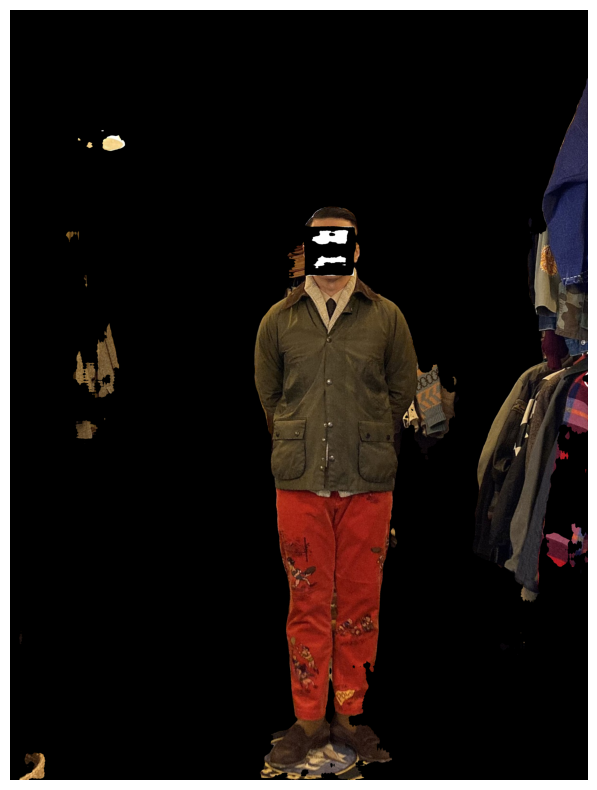

In [16]:

# 결과 이미지 출력
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
